In [0]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils

from sklearn import svm
from sklearn.decomposition import PCA
import keras     
import seaborn as sns
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [0]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('Y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', y_test.shape)

n_cat = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [0]:
print(' Before creating Validation set: \n\n')
print(f' X_train Shape: {X_train.shape} \n')
print(f' y_train Shape: {y_train.shape} \n')
print(f' X_test Shape: {X_test.shape} \n')
print(f' y_test Shape: {y_test.shape} \n\n')

X_train, X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 13)

print(' After creating Validation set: \n\n')
print(f' X_train Shape: {X_train.shape} \n')
print(f' y_train Shape: {y_train.shape} \n')
print(f' X_val Shape: {X_val.shape} \n')
print(f' y_val Shape: {y_val.shape} \n\n')

X_train_flat = X_train.reshape(-1,3072)
X_test_flat = X_test.reshape(-1,3072)
X_val_flat = X_val.reshape(-1,3072)

print(' After Flattening the data: \n\n')
print(f' X_train Flattended Shape: {X_train_flat.shape} \n')
print(f' X_test Flattended Shape: {X_test_flat.shape} \n')
print(f' X_val Flattended Shape: {X_val_flat.shape} \n')

 Before creating Validation set: 


 X_train Shape: (50000, 32, 32, 3) 

 y_train Shape: (50000, 1) 

 X_test Shape: (10000, 32, 32, 3) 

 y_test Shape: (10000, 1) 


 After creating Validation set: 


 X_train Shape: (33500, 32, 32, 3) 

 y_train Shape: (33500, 1) 

 X_val Shape: (16500, 32, 32, 3) 

 y_val Shape: (16500, 1) 


 After Flattening the data: 


 X_train Flattended Shape: (33500, 3072) 

 X_test Flattended Shape: (10000, 3072) 

 X_val Flattended Shape: (16500, 3072) 



In [0]:
feature_columns = ['pixel'+str(i) for i in range(X_train_flat.shape[1])]
df_cifar = pd.DataFrame(X_train_flat,columns=feature_columns)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))
print(f' \n Head of the DataFrame: \n')
df_cifar.head()

Size of the dataframe: (33500, 3073)
 
 Head of the DataFrame: 



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.200000,0.313726,0.149020,0.196078,0.305882,0.145098,0.196078,0.305882,0.145098,0.192157,0.309804,0.149020,0.188235,0.313726,0.149020,0.184314,0.309804,0.145098,0.180392,0.305882,0.141176,0.184314,0.305882,0.141176,0.188235,0.309804,0.145098,0.196078,0.317647,0.152941,0.200000,0.321569,0.156863,0.211765,0.329412,0.168627,0.223529,0.333333,0.192157,0.231373,...,0.521569,0.549020,0.372549,0.513726,0.541176,0.368627,0.498039,0.525490,0.360784,0.501961,0.533333,0.368627,0.431373,0.466667,0.301961,0.368627,0.407843,0.254902,0.270588,0.329412,0.192157,0.211765,0.305882,0.156863,0.211765,0.317647,0.164706,0.223529,0.317647,0.168627,0.243137,0.325490,0.180392,0.254902,0.337255,0.192157,0.262745,0.345098,0.196078,2
1,0.549020,0.654902,0.690196,0.564706,0.674510,0.705882,0.564706,0.674510,0.705882,0.564706,0.674510,0.705882,0.568627,0.674510,0.709804,0.560784,0.678431,0.721569,0.545098,0.678431,0.737255,0.552941,0.686275,0.745098,0.552941,0.686275,0.745098,0.549020,0.678431,0.741176,0.541176,0.670588,0.733333,0.529412,0.662745,0.721569,0.549020,0.666667,0.713726,0.556863,...,0.498039,0.572549,0.611765,0.490196,0.568627,0.580392,0.478431,0.560784,0.545098,0.458824,0.545098,0.513726,0.439216,0.525490,0.498039,0.439216,0.521569,0.498039,0.470588,0.552941,0.517647,0.501961,0.584314,0.564706,0.513726,0.592157,0.596078,0.521569,0.600000,0.619608,0.517647,0.596078,0.607843,0.509804,0.588235,0.588235,0.501961,0.584314,0.588235,8
2,0.435294,0.627451,0.815686,0.435294,0.635294,0.823529,0.435294,0.596078,0.745098,0.188235,0.282353,0.392157,0.203922,0.282353,0.388235,0.411765,0.501961,0.627451,0.431373,0.513726,0.635294,0.266667,0.325490,0.431373,0.231373,0.309804,0.415686,0.458824,0.615686,0.752941,0.447059,0.654902,0.835294,0.450980,0.654902,0.831373,0.462745,0.650980,0.823529,0.454902,...,0.839216,0.796078,0.607843,0.694118,0.670588,0.529412,0.533333,0.529412,0.447059,0.623529,0.615686,0.509804,0.839216,0.803922,0.611765,0.905882,0.854902,0.607843,0.874510,0.835294,0.603922,0.764706,0.745098,0.592157,0.819608,0.800000,0.674510,0.905882,0.874510,0.686275,0.929412,0.882353,0.639216,0.929412,0.866667,0.607843,0.929412,0.858824,0.611765,7
3,0.196078,0.207843,0.180392,0.196078,0.203922,0.180392,0.188235,0.200000,0.172549,0.180392,0.192157,0.164706,0.180392,0.192157,0.164706,0.176471,0.188235,0.160784,0.172549,0.184314,0.156863,0.168627,0.180392,0.152941,0.168627,0.180392,0.152941,0.168627,0.180392,0.152941,0.168627,0.180392,0.152941,0.172549,0.184314,0.156863,0.176471,0.188235,0.160784,0.176471,...,0.313726,0.321569,0.262745,0.321569,0.329412,0.278431,0.309804,0.317647,0.262745,0.313726,0.321569,0.266667,0.317647,0.333333,0.274510,0.325490,0.341176,0.282353,0.321569,0.337255,0.278431,0.321569,0.333333,0.278431,0.321569,0.337255,0.282353,0.317647,0.333333,0.270588,0.305882,0.325490,0.250980,0.286275,0.309804,0.223529,0.258824,0.294118,0.200000,2
4,0.172549,0.298039,0.200000,0.168627,0.282353,0.203922,0.125490,0.223529,0.164706,0.078431,0.168627,0.125490,0.117647,0.203922,0.145098,0.149020,0.243137,0.156863,0.164706,0.247059,0.184314,0.082353,0.141176,0.109804,0.062745,0.109804,0.101961,0.054902,0.086275,0.098039,0.062745,0.070588,0.098039,0.066667,0.070588,0.101961,0.066667,0.070588,0.101961,0.082353,...,0.611765,0.560784,0.490196,0.619608,0.568627,0.

In [0]:
pca = PCA(n_components=2)
principalComponents_cifar = pca.fit_transform(df_cifar.iloc[:,:-1])
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['Principal Component 1', 'Principal Component 2'])
principal_cifar_Df['y'] = y_train

print('Explained Variation per Principal Component: {}'.format(pca.explained_variance_ratio_))
print(f'\n Reduced Principal Components: \n')
principal_cifar_Df.head()

Explained Variation per Principal Component: [0.29101396 0.11249343]

 Reduced Principal Components: 



,Principal Component 1,Principal Component 2,y
0,-10.305251,-0.916663,2
1,5.867990,0.462796,8
2,3.274939,3.772668,7
3,-11.615193,0.004026,2
4,-7.713751,3.481545,7


 3072 Features reduced to 98 Features 
 
 After Transforming the data: 


 X_train Transformed Shape: (33500, 98) 

 X_test Transformed Shape: (10000, 98) 

 X_val Transformed Shape: (16500, 98) 



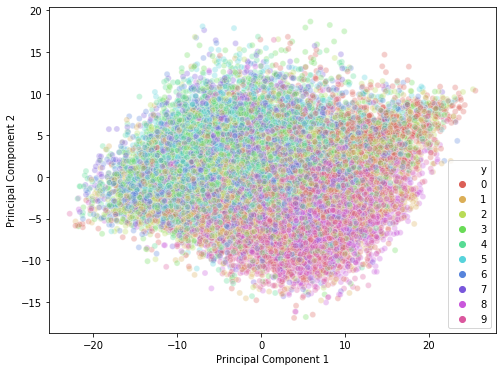

In [0]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Principal Component 1", y="Principal Component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)
plt.savefig('PCA_2.jpg', dpi=200)

pca = PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
pca.fit(X_train_flat)
print(f' 3072 Features reduced to {pca.n_components_} Features \n ')

X_train_transformed = pca.transform(X_train_flat)
X_test_transformed = pca.transform(X_test_flat)
X_val_transformed = pca.transform(X_val_flat)

X_train_transformed.shape,X_test_transformed.shape,X_val_transformed.shape
print(' After Transforming the data: \n\n')
print(f' X_train Transformed Shape: {X_train_transformed.shape} \n')
print(f' X_test Transformed Shape: {X_test_transformed.shape} \n')
print(f' X_val Transformed Shape: {X_val_transformed.shape} \n')

In [0]:
#Logistic Regression

grid={"C":[0.0001,0.001,0.01,1], "penalty":["l1","l2"]}

logreg = LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_transformed,y_train)

print(f' \n Best parameters: {logreg_cv.best_params_}')
print(f' \n Accuracy: {logreg_cv.best_score_}')

 
 Best parameters: {'C': 0.01, 'penalty': 'l2'}
 
 Accuracy: 0.39770000000000005


 Logistic Regression Score: 39.739999999999995

Classification Report: 

               precision    recall  f1-score   support

           0       0.45      0.47      0.46      1000
           1       0.46      0.48      0.47      1000
           2       0.30      0.26      0.28      1000
           3       0.29      0.25      0.27      1000
           4       0.35      0.27      0.31      1000
           5       0.34      0.35      0.34      1000
           6       0.40      0.49      0.44      1000
           7       0.44      0.41      0.42      1000
           8       0.46      0.52      0.49      1000
           9       0.44      0.47      0.46      1000

    accuracy                           0.40     10000
   macro avg       0.39      0.40      0.39     10000
weighted avg       0.39      0.40      0.39     10000




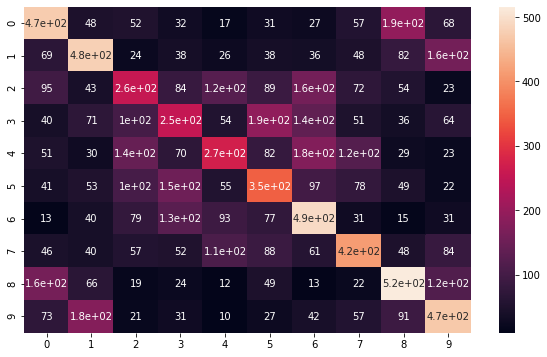

In [0]:
best_logreg = LogisticRegression(penalty='l2',C=0.01)
best_logreg.fit(X_train_transformed, y_train)
y_pred = best_logreg.predict(X_test_transformed) 
log_score = best_logreg.score(X_test_transformed, y_test)
log_conf_mat = confusion_matrix(y_test, y_pred)

print(f' Logistic Regression Score: {accuracy_score(y_pred, y_test)*100}\n')
print(f'Classification Report: \n\n {classification_report(y_test, y_pred)}\n')

plt.figure(figsize=(10,6))
sns.heatmap(log_conf_mat, annot=True)

In [0]:
# Random Forest Classifier

n_estimators = [100,300,450]
max_depth = [5, 8]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

random_forest = RandomForestClassifier()

gridF = GridSearchCV(random_forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_transformed, y_train)
print(bestF)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 25.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Random Forest Score: 0.4457

Classification Report: 

               precision    recall  f1-score   support

           0       0.52      0.54      0.53      1000
           1       0.51      0.54      0.52      1000
           2       0.37      0.31      0.34      1000
           3       0.29      0.25      0.27      1000
           4       0.43      0.37      0.40      1000
           5       0.36      0.37      0.36      1000
           6       0.46      0.54      0.50      1000
           7       0.49      0.42      0.45      1000
           8       0.52      0.61      0.56      1000
           9       0.46      0.50      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.44      0.45      0.44     10000
weighted avg       0.44      0.45      0.44     10000




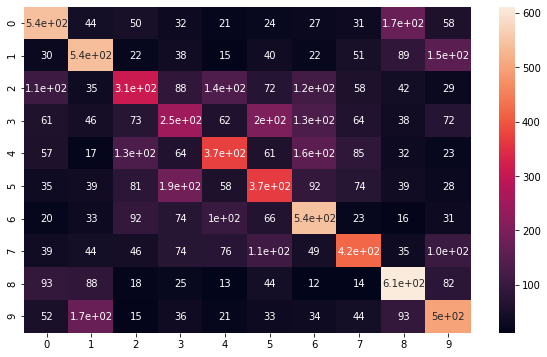

In [0]:
Optimal_random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
Optimal_random_forest.fit(X_train_transformed, y_train)
y_pred = Optimal_random_forest.predict(X_test_transformed)
random_forest_score = Optimal_random_forest.score(X_test_transformed, y_pred)
random_forest_conf_mat = confusion_matrix(y_test, y_pred)

print(f'Random Forest Score: {Optimal_random_forest.score(X_test_transformed, y_test)}\n')
print(f'Classification Report: \n\n {classification_report(y_test, y_pred)}\n')

plt.figure(figsize=(10,6))
sns.heatmap(random_forest_conf_mat, annot=True)

In [0]:
#Support Vector Machine - Gaussian Kernel

param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_val_transformed, y_val) 

print(f' Best Parameters: {grid.best_params_}') 
print(f' Best Estimator: {grid.best_estimator_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 54.2min finished


 Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
 Best Estimator: SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


 Gaussian SVC Score: 0.5367

Classification Report: 

               precision    recall  f1-score   support

           0       0.58      0.61      0.60      1000
           1       0.63      0.66      0.64      1000
           2       0.42      0.44      0.43      1000
           3       0.34      0.38      0.36      1000
           4       0.50      0.48      0.49      1000
           5       0.46      0.44      0.45      1000
           6       0.59      0.58      0.59      1000
           7       0.63      0.55      0.58      1000
           8       0.66      0.64      0.65      1000
           9       0.59      0.59      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000




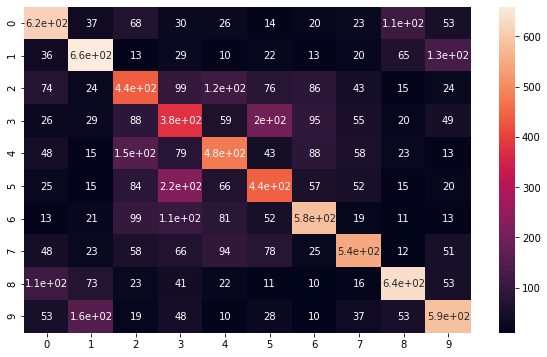

In [0]:
svm_gaussian = SVC(kernel = 'rbf',C = 10, gamma= 0.01)
svm_gaussian.fit(X_train_transformed,y_train)
y_pred = svm_gaussian.predict(X_test_transformed)
svm_rbf_score = svm_gaussian.score(X_test_transformed, y_test)
svm_rbf_conf_mat = confusion_matrix(y_test, y_pred)

print(f' Gaussian SVC Score: {svm_gaussian.score(X_test_transformed, y_test)}\n')
print(f'Classification Report: \n\n {classification_report(y_test, y_pred)}\n')

plt.figure(figsize=(10,6))
sns.heatmap(svm_rbf_conf_mat, annot=True)

In [0]:
#Support Vector Machine - Linear Kernel

param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_val_transformed, y_val) 

print(f' Best Parameters: {grid.best_params_}') 
print(f' Best Estimator: {grid.best_estimator_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 18.1min


 Linear SVC Score: 0.405

Classification Report: 

               precision    recall  f1-score   support

           0       0.46      0.50      0.48      1000
           1       0.47      0.48      0.47      1000
           2       0.30      0.29      0.29      1000
           3       0.31      0.30      0.30      1000
           4       0.34      0.28      0.31      1000
           5       0.34      0.32      0.33      1000
           6       0.41      0.50      0.45      1000
           7       0.45      0.41      0.43      1000
           8       0.48      0.52      0.50      1000
           9       0.45      0.46      0.45      1000

    accuracy                           0.41     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.41      0.40     10000




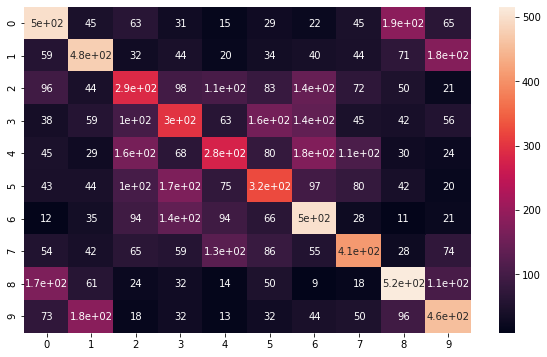

In [0]:
svm_linear = SVC(kernel = 'linear',C = 10, gamma= 0.01)
svm_linear.fit(X_train_transformed,y_train)
y_pred = svm_linear.predict(X_test_transformed)
svm_linear_score = svm_linear.score(X_test_transformed, y_test)
svm_linear_conf_mat = confusion_matrix(y_test, y_pred)

print(f' Linear SVC Score: {svm_linear.score(X_test_transformed, y_test)}\n')
print(f'Classification Report: \n\n {classification_report(y_test, y_pred)}\n')

plt.figure(figsize=(10,6))
sns.heatmap(svm_linear_conf_mat, annot=True)

In [0]:
# K-Nearest Neighbors

grid_params = { 'n_neighbors' :[3,5,9],
                  'weights': ['uniform', 'distance'], 
                      'metric': ['euclidean','manhattan']}

grid_search = GridSearchCV(KNeighborsClassifier(),grid_params, verbose = 1, cv=5,n_jobs=-1)
grid_search_result = grid_search.fit(X_train_transformed, y_train)

print(f' Score: \n {grid_search_result.best_score_}')
print(f' Best Estimator: {grid_search_result.best_estimator_}')
print(f' Best Parameters: {grid_search_result.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 25.6min finished


 Score: 
 0.3717910447761194
 Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
 Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


 KNN Score: 0.3819

Classification Report: 

               precision    recall  f1-score   support

           0       0.46      0.51      0.48      1000
           1       0.68      0.26      0.38      1000
           2       0.26      0.39      0.31      1000
           3       0.31      0.18      0.23      1000
           4       0.27      0.48      0.34      1000
           5       0.44      0.27      0.34      1000
           6       0.32      0.48      0.38      1000
           7       0.56      0.31      0.40      1000
           8       0.43      0.66      0.52      1000
           9       0.64      0.28      0.39      1000

    accuracy                           0.38     10000
   macro avg       0.44      0.38      0.38     10000
weighted avg       0.44      0.38      0.38     10000




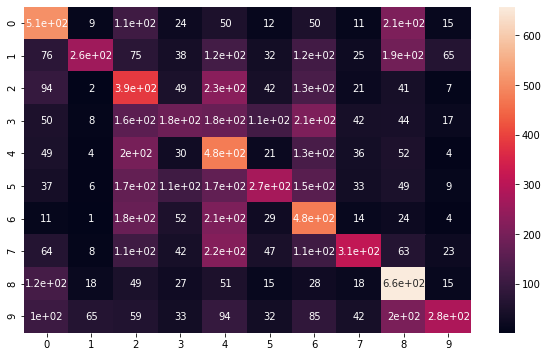

In [0]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
KNN.fit(X_train_transformed, y_train)
y_pred = KNN.predict(X_test_transformed)
KNN_score = KNN.score(X_test_transformed, y_test)
KNN_conf_mat = confusion_matrix(y_test, y_pred)

print(f' KNN Score: {KNN.score(X_test_transformed, y_test)}\n')
print(f'Classification Report: \n\n {classification_report(y_test, y_pred)}\n')

plt.figure(figsize=(10,6))
sns.heatmap(KNN_conf_mat, annot=True)